In [1]:
#!/usr/bin/env python
# coding: utf-8

!pip install -q pandas
!pip install -q matplotlib
!pip install -q plotly
!pip install -q ipywidgets
!pip install -q neuralprophet
!pip install -q jupyterlab
!pip install -q psutil

import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import matplotlib as mpl
import plotly.graph_objects as go
from neuralprophet import NeuralProphet, set_log_level

g_epochs = 20

In [65]:
# Load the dataset from the CSV file using pandas
csv_data = pd.read_csv("https://github.com/ourownstory/neuralprophet-data/raw/main/kaggle-energy/datasets/tutorial01.csv")
#csv_data = pd.read_csv("day.csv")
df = csv_data
#df.fillna(0)
#df.describe
#df.info()
df.head()[:2]

,ds,y
0,2014-12-31,65.41
1,2015-01-01,62.09


In [66]:
df.describe()

,y
count,1462.000000
mean,57.889220
std,12.067133
min,14.510000
25%,50.830000
50%,58.605000
75%,66.510000
max,98.980000


In [67]:
"""
df_max_scaled = df.copy()  
# apply normalization
column = 'y'
df_max_scaled[column] = np.log(df_max_scaled[column] /df_max_scaled[column].abs().max())
plt = df_max_scaled.plot(x="ds", y="y", figsize=(5, 4))
#display(df_max_scaled)
"""

'\ndf_max_scaled = df.copy()  \n# apply normalization\ncolumn = \'y\'\ndf_max_scaled[column] = np.log(df_max_scaled[column] /df_max_scaled[column].abs().max())\nplt = df_max_scaled.plot(x="ds", y="y", figsize=(5, 4))\n#display(df_max_scaled)\n'

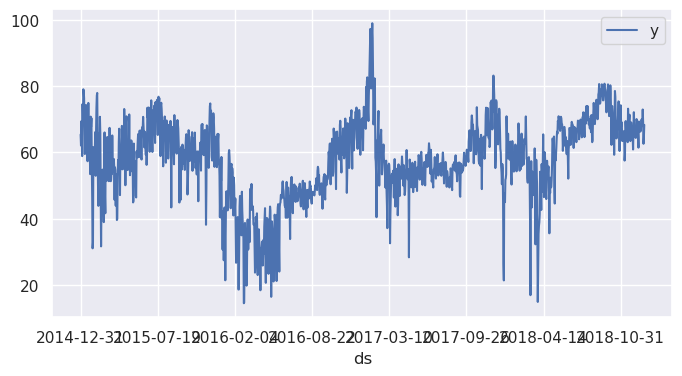

In [68]:
plt = df.plot(x="ds", y="y", figsize=(8, 4))

In [69]:
#df['y'] = np.log(df['y']) # np.log2(df['y']) np.log10(df['y'])
#df.head()[:2]
#plt = df.plot(x="ds", y="y", figsize=(5, 4))

In [70]:
df.describe()

,y
count,1462.000000
mean,57.889220
std,12.067133
min,14.510000
25%,50.830000
50%,58.605000
75%,66.510000
max,98.980000


In [71]:
# Import the NeuralProphet class
from neuralprophet import NeuralProphet, set_log_level

# Disable logging messages unless there is an error
set_log_level("ERROR")

In [72]:
# Create a NeuralProphet model with default parameters
"""
m = NeuralProphet(  
    
    seasonality_mode = "additive",  # additive multiplicative
    learning_rate = 0.01,  # 0.01    (try values ~0.001-10).
    #trend_reg=1,
    growth='linear', # off , default 'linear
    #trend_reg_threshold = True,
    #newer_samples_weight = 4,
    #seasonality_reg=0.5,
    #season_global_local= 'global',
    #ar_reg=5.5,
    #ar_layers=10,
    #n_forecasts=3,
    #loss_func = 'Huber', # (default) Huber, MSE, MAE
    #normalize = 'off', # off, default soft
    #global_normalization = True,
    #accelerator='auto',
  
      
    # Disable change trendpoints
    #n_changepoints=2,
    
    # Disable or enable seasonality components
    yearly_seasonality = True,
    weekly_seasonality = False,
    daily_seasonality = True,
    
    epochs=20, # def 200
    collect_metrics=["MSE", "MAE", "RMSE"],
    #n_lags=2, # Previous time series steps to include in auto-regression.
    #quantiles=[0.00, 0.99]
    #n_lags=3, 
    #changepoints_range=0.95
)
"""

'\nm = NeuralProphet(  \n    \n    seasonality_mode = "additive",  # additive multiplicative\n    learning_rate = 0.01,  # 0.01    (try values ~0.001-10).\n    #trend_reg=1,\n    growth=\'linear\', # off , default \'linear\n    #trend_reg_threshold = True,\n    #newer_samples_weight = 4,\n    #seasonality_reg=0.5,\n    #season_global_local= \'global\',\n    #ar_reg=5.5,\n    #ar_layers=10,\n    #n_forecasts=3,\n    #loss_func = \'Huber\', # (default) Huber, MSE, MAE\n    #normalize = \'off\', # off, default soft\n    #global_normalization = True,\n    #accelerator=\'auto\',\n  \n      \n    # Disable change trendpoints\n    #n_changepoints=2,\n    \n    # Disable or enable seasonality components\n    yearly_seasonality = True,\n    weekly_seasonality = False,\n    daily_seasonality = True,\n    \n    epochs=20, # def 200\n    collect_metrics=["MSE", "MAE", "RMSE"],\n    #n_lags=2, # Previous time series steps to include in auto-regression.\n    #quantiles=[0.00, 0.99]\n    #n_lags=3, \

In [73]:
# https://neuralprophet.com/code/forecaster.html
# https://rdrr.io/github/AlbertoAlmuinha/neuralprophet/man/neural_prophet.html
m = NeuralProphet(
        growth="linear", # linear  off
        ##changepoints=None,
        ##n_changepoints=50, # 5
        ##changepoints_range=0.9, # 0.8 0.95
        ##trend_reg=1,
        ##trend_reg_threshold=False,
        yearly_seasonality="auto",
        weekly_seasonality=False, #"auto",
        daily_seasonality=True, # "auto",
        seasonality_mode="additive", # multiplicative
        seasonality_reg=0,
        n_forecasts=1, # 1
        n_lags=12,     # 0
        #batch_size=16,
        #learning_rate=None,
        ##learning_rate=0.03, # 0.0.01 - 1.0
        epochs=g_epochs,
        ##loss_func="Huber",
        normalize="auto",
        impute_missing=True,
        #collect_metrics=["MSE", "MAE", "RMSE"]          
)

In [74]:
# Use static plotly in notebooks
m.set_plotting_backend("matplotlib") # 'plotly', 'plotly-resampler' or 'matplotlib'."
# Fit the model on the dataset (this might take a bit)
metrics = m.fit(df, freq="D") # D MS H 5min, D, MS or auto - Multiplicative Seasonality
metrics.tail()

Finding best initial lr:   0%|          | 0/229 [00:00<?, ?it/s]

Training: 0it [00:00, ?it/s]

,MAE,RMSE,Loss,RegLoss,epoch
15,4.228780,5.741370,0.003316,0.0,15
16,4.244303,5.772259,0.003323,0.0,16
17,4.189998,5.649986,0.003248,0.0,17
18,4.194757,5.666124,0.003249,0.0,18
19,4.207676,5.697941,0.003277,0.0,19


In [75]:
# Create a new dataframe 
l_df = round(len(df)/2)
df_future = m.make_future_dataframe(df, periods=356, n_historic_predictions=l_df)  # n_historic_predictions=len(df), n_historic_predictions=True, n_historic_predictions=24
# Predict the future
forecast = m.predict(df_future)
#forecast[['ds', 'yhat1','trend']].tail()
forecast.tail()

Predicting: 46it [00:00, ?it/s]

,ds,y,yhat1,ar1,trend,season_yearly,season_daily
739,2018-12-28,69.23,68.423386,53.372143,100.126633,2.209451,-13.801752
740,2018-12-29,62.62,69.048843,53.957001,100.195137,2.087144,-13.801752
741,2018-12-30,64.57,66.227615,51.091846,100.263649,1.979374,-13.801752
742,2018-12-31,68.32,65.809082,50.626568,100.332153,1.886556,-13.801752
743,2019-01-01,NaN,69.570236,54.338669,100.400658,1.808938,-13.801752


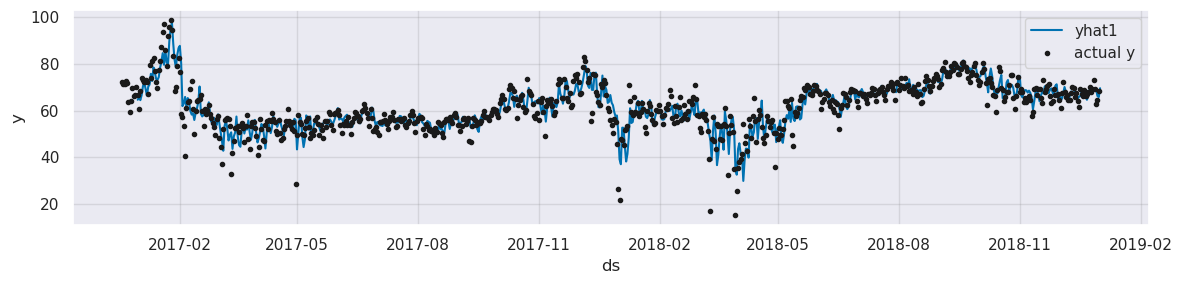

In [76]:
fig_forecast = m.plot(forecast,figsize=(12,3))

In [77]:
#m = m.highlight_nth_step_ahead_of_each_forecast(1)
#fig = m.plot(forecast[144:6*288],figsize=(12,3))

In [78]:
"""
import matplotlib.pyplot as plt
import matplotlib as mpl
#SMALL_SIZE = 8
#MEDIUM_SIZE = 10
#BIGGER_SIZE = 12
#plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
#plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
#plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
#plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
#plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
#plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
#plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title
#mpl.rc('xtick', labelsize=8) 
#mpl.rc('ytick', labelsize=8) 
#plt.rcParams.update({'font.size': 8})
fig, ax = plt.subplots(figsize=(12, 4),dpi=80)
m.plot(forecast, xlabel="Date", ylabel="Amount", ax=ax)
ax.xaxis.label.set_size(12)
ax.yaxis.label.set_size(12)
ax.tick_params(axis='both', which='major', labelsize=9)
ax.set_title("Mean", fontsize=10, fontweight="bold")
#fig.savefig("mean.png", **savefig_options)
plt.close
"""

'\nimport matplotlib.pyplot as plt\nimport matplotlib as mpl\n#SMALL_SIZE = 8\n#MEDIUM_SIZE = 10\n#BIGGER_SIZE = 12\n#plt.rc(\'font\', size=SMALL_SIZE)          # controls default text sizes\n#plt.rc(\'axes\', titlesize=SMALL_SIZE)     # fontsize of the axes title\n#plt.rc(\'axes\', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels\n#plt.rc(\'xtick\', labelsize=SMALL_SIZE)    # fontsize of the tick labels\n#plt.rc(\'ytick\', labelsize=SMALL_SIZE)    # fontsize of the tick labels\n#plt.rc(\'legend\', fontsize=SMALL_SIZE)    # legend fontsize\n#plt.rc(\'figure\', titlesize=BIGGER_SIZE)  # fontsize of the figure title\n#mpl.rc(\'xtick\', labelsize=8) \n#mpl.rc(\'ytick\', labelsize=8) \n#plt.rcParams.update({\'font.size\': 8})\nfig, ax = plt.subplots(figsize=(12, 4),dpi=80)\nm.plot(forecast, xlabel="Date", ylabel="Amount", ax=ax)\nax.xaxis.label.set_size(12)\nax.yaxis.label.set_size(12)\nax.tick_params(axis=\'both\', which=\'major\', labelsize=9)\nax.set_title("Mean", fontsize=10,

In [79]:
# fig_components = m.plot_components(forecast,figsize=(15,8))

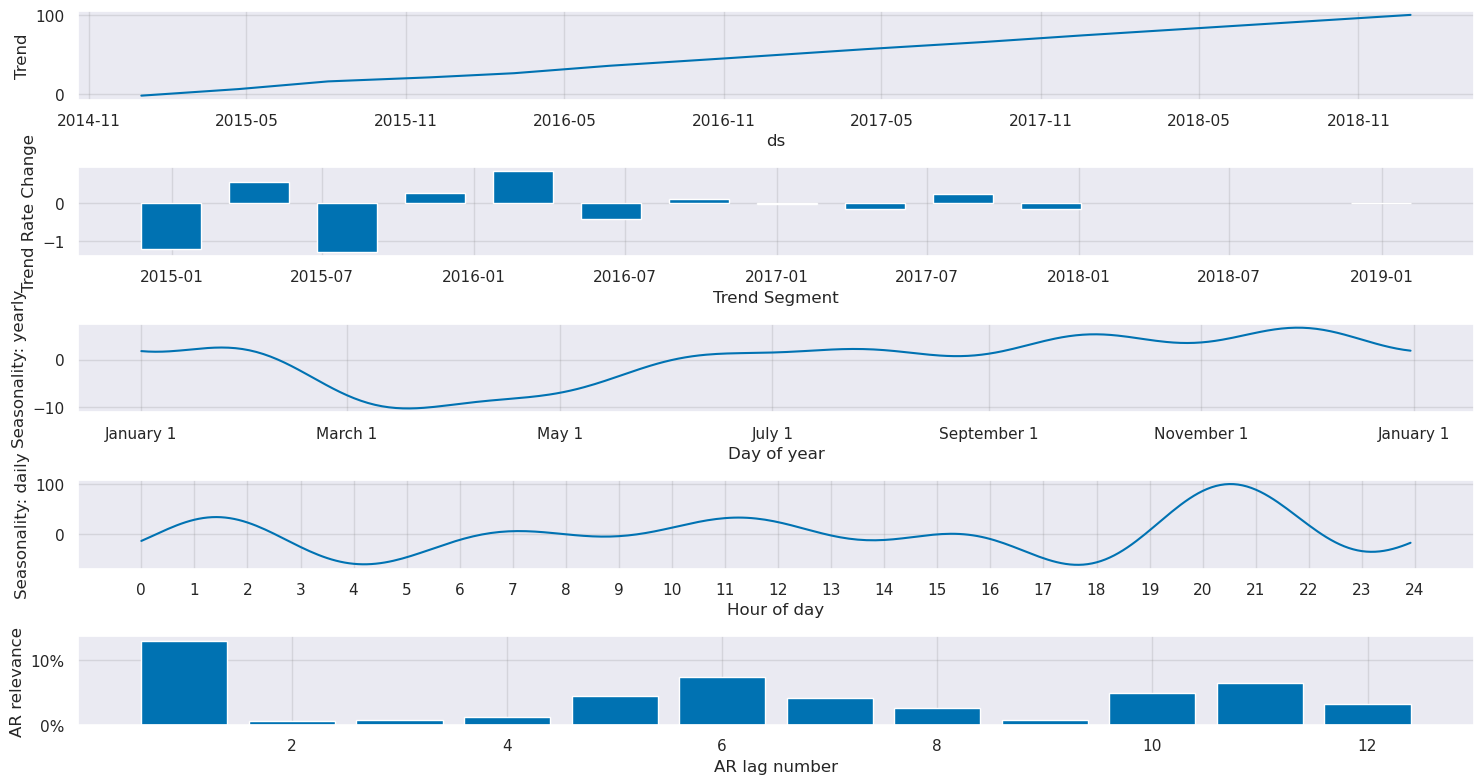

In [80]:
fig_components = m.plot_parameters(forecast,figsize=(15,8))
#ax.figure.savefig('data_forecast_parameters.png')

In [81]:
# folds = m.crossvalidation_split_df(df, k = 2, fold_pct = 0.2, global_model_cv_type = 'intersect')

In [82]:
# fig_components = m.plot_parameters(folds,figsize=(15,8))

<Axes: xlabel='ds'>

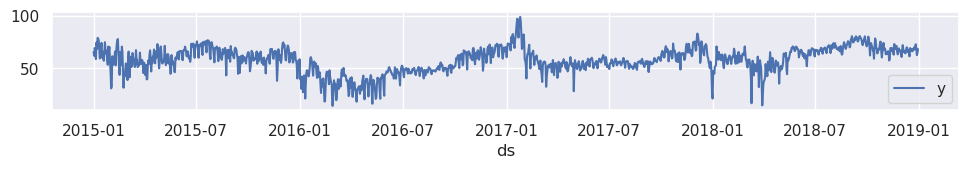

In [83]:
import seaborn as sns
sns.set(rc={'figure.figsize':(11.7,1.27)})
df['ds'] = pd.to_datetime(df['ds'])
#plt.figure(figsize=(20,4))
sns.lineplot(data = df.set_index('ds'))

In [84]:
########################################
# Prophet Forecast
########################################
m_baseline = NeuralProphet(epochs=g_epochs)
df_train, df_test = m_baseline.split_df(df, freq='D') # , valid_p = 0.20
#plt.figure(figsize=(20,4))
metrics = m_baseline.fit(df_train, freq='D',validation_df=df_test)

Finding best initial lr:   0%|          | 0/227 [00:00<?, ?it/s]

Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Predicting: 37it [00:00, ?it/s]

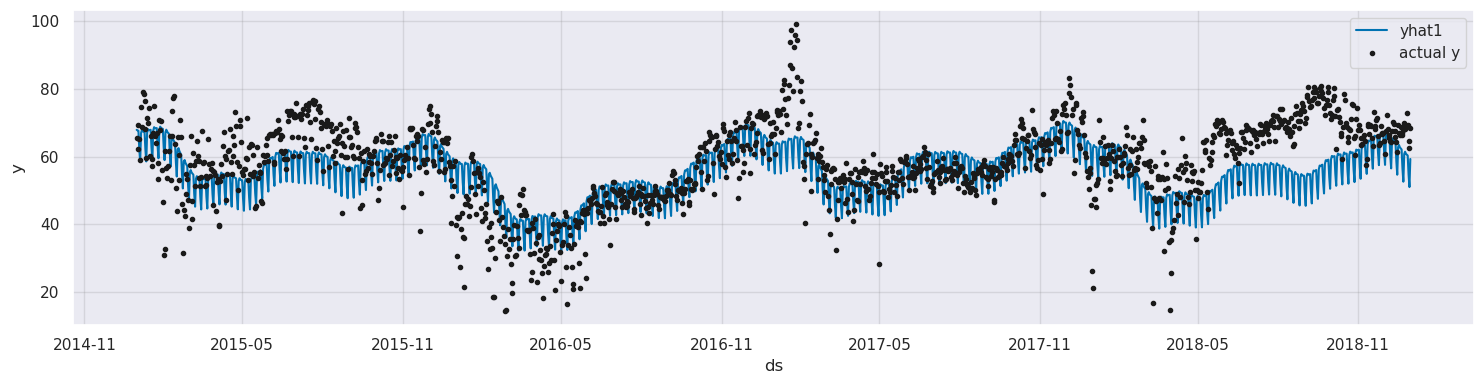

In [85]:
# Validate Prophet Forecast
forecast_baseline = m_baseline.predict(df)
fig_components = m.plot(forecast_baseline,figsize=(15,4))
#ax.figure.savefig('data_forecast_baseline.png')

In [86]:
# Enable Neural Prophet AR model
m_add_lag = NeuralProphet(n_lags=12*24, epochs=g_epochs)
df_train, df_test = m_add_lag.split_df(df, freq='D', valid_p = 0.20)
metrics_lag = m_add_lag.fit(df_train, freq='D',validation_df=df_test)
metrics_lag.tail()

Finding best initial lr:   0%|          | 0/228 [00:00<?, ?it/s]

Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

,MAE_val,RMSE_val,Loss_val,RegLoss_val,epoch,MAE,RMSE,Loss,RegLoss
15,6.478470,8.314938,0.010003,0.0,15,6.086051,7.678841,0.007213,0.0
16,6.140992,8.162333,0.009639,0.0,16,5.996516,7.501138,0.006865,0.0
17,5.895010,7.915452,0.009065,0.0,17,5.967023,7.429154,0.006777,0.0
18,5.940965,7.911164,0.009055,0.0,18,5.816302,7.288227,0.006496,0.0
19,5.937509,7.901145,0.009032,0.0,19,5.777150,7.187493,0.006411,0.0


Predicting: 59it [00:00, ?it/s]

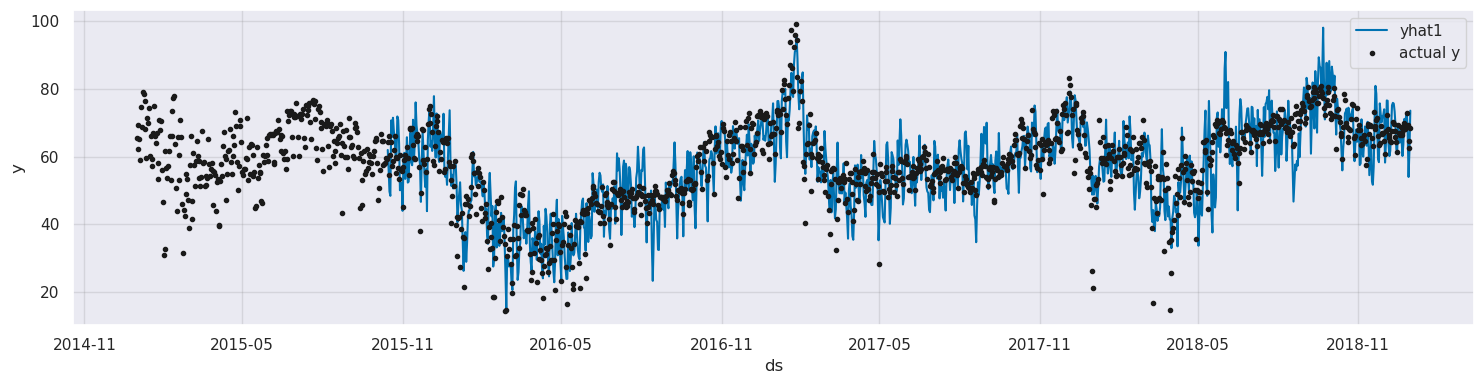

In [87]:
forecast_ar = m_add_lag.predict(df)
fig_components = m.plot(forecast_ar,figsize=(15,4))

In [88]:

mbc = NeuralProphet(
    n_forecasts=6,
    n_lags=12,
    n_changepoints=50,
    learning_rate=1.0,
    #n_changepoints=100,
    #loss_func="MSE",
    growth='linear',
    yearly_seasonality=True,
    weekly_seasonality=False,
    daily_seasonality=True,
    #n_lags=24*3, 
    #learning_rate=0.003,
    epochs=g_epochs,
)
#df_train, df_valid = df[:int(len(df)*0.8)], df[int(len(df)*0.8):]
#df_valid, df_test = df_valid[:len(df_valid)//2], df_valid[len(df_valid)//2:]

df_train, df_test = mbc.split_df(df, valid_p=0.2)
#df_train, df_valid = mbc.split_df(df, valid_p=0.1)
#df_valid, df_test = mbc.split_df(df_valid, valid_p=0.1)
#train_metrics = mbc.fit(df_train)
#test_metrics = mbc.test(df_test)
#print(len(df_train), len(df_test), len(df_valid))
print(len(df_train), len(df_test))


#df_train_mbc, df_test_mbc = mbc.split_df(df, freq='D') # , 
#df_train, df_test = m.split_df(df[["ds","y"]], freq='D') # 
#df_train, df_test = m.split_df(df[["ds","y"]], freq='D') # , valid_p = 1.0/12
#metrics_mb = mbc.fit(df_train_mbc, freq='D', validation_df=df_test_mbc) # ,  epochs=20
#metrics_mb.tail(1)


1169 305


In [89]:
#future_mbc =mbc.make_future_dataframe(df, periods=60, n_historic_predictions=True)
#forecast_mbc= mbc.predict(future_mbc)
#print(forecast)
#forecast[['ds', 'yhat1','trend']].tail()
#fig3 = mbc.plot(forecast_mbc)

In [90]:
metrics = mbc.fit(df_train, freq='D', validation_df=df_test,epochs=g_epochs)
metrics.tail()

Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

,MAE_val,RMSE_val,Loss_val,RegLoss_val,epoch,MAE,RMSE,Loss,RegLoss
15,5.571099,7.016530,0.007085,0.0,15,4.568468,6.205689,0.004077,0.0
16,5.944327,7.349852,0.007775,0.0,16,4.555717,6.216401,0.004076,0.0
17,5.860983,7.275405,0.007618,0.0,17,4.562634,6.193672,0.004058,0.0
18,5.858626,7.270030,0.007607,0.0,18,4.557348,6.186062,0.004046,0.0
19,5.845683,7.258826,0.007583,0.0,19,4.553467,6.190012,0.004042,0.0


In [91]:
future_mbc = mbc.make_future_dataframe(df, periods=356, n_historic_predictions=True) # n_historic_predictions=len(df)
forecast_mbc = mbc.predict(future_mbc)
forecast_mbc

Predicting: 36it [00:00, ?it/s]

,ds,y,yhat1,yhat2,yhat3,yhat4,yhat5,yhat6,ar1,ar2,ar3,ar4,ar5,ar6,trend,season_yearly,season_daily
0,2014-12-31,65.41,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2015-01-01,62.09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2015-01-02,69.44,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2015-01-03,65.22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2015-01-04,58.91,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1463,2019-01-02,NaN,NaN,62.908264,61.696526,60.740326,62.443733,61.808754,NaN,39.086941,36.919922,35.292561,34.578903,32.639858,-0.201195,4.117814,48.854393
1464,2019-01-03,NaN,NaN,NaN,63.840919,62.490585,61.888817,62.662621,NaN,NaN,39.048340,37.028206,34.019028,33.491730,-0.223104,3.964178,48.854393
1465,2019-01-04,NaN,NaN,NaN,NaN,61.032227,59.443901,59.263115,NaN,NaN,NaN,35.544514,31.557280,30.077248,-0.245014,3.832418,48.854393
1466,2019-01-05,NaN,NaN,NaN,NaN,NaN,58.218895,57.967552,NaN,NaN,NaN,NaN,30.304384,28.754570,-0.266923,3.722493,48.854393


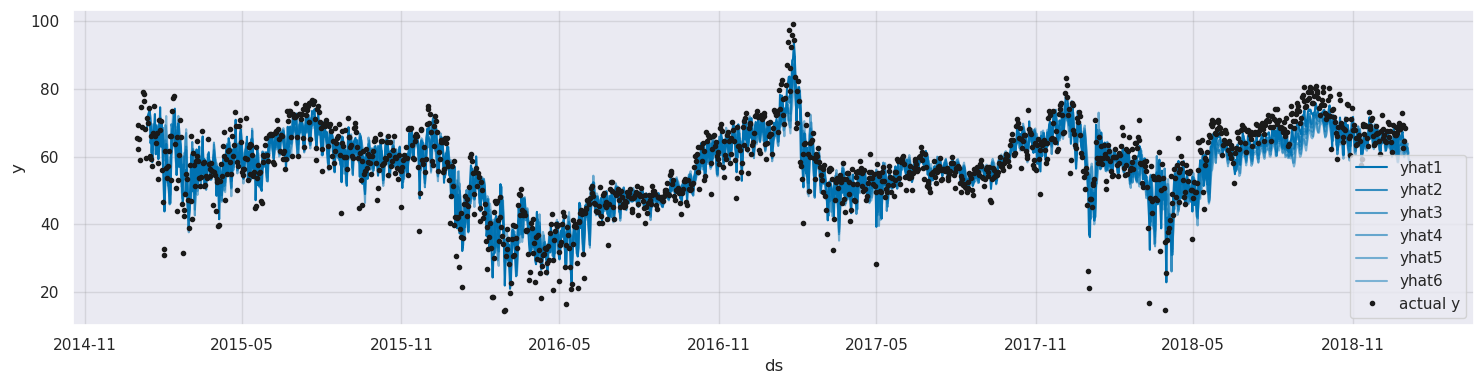

In [92]:
fig_forecast = m.plot(forecast_mbc,figsize=(15,4))

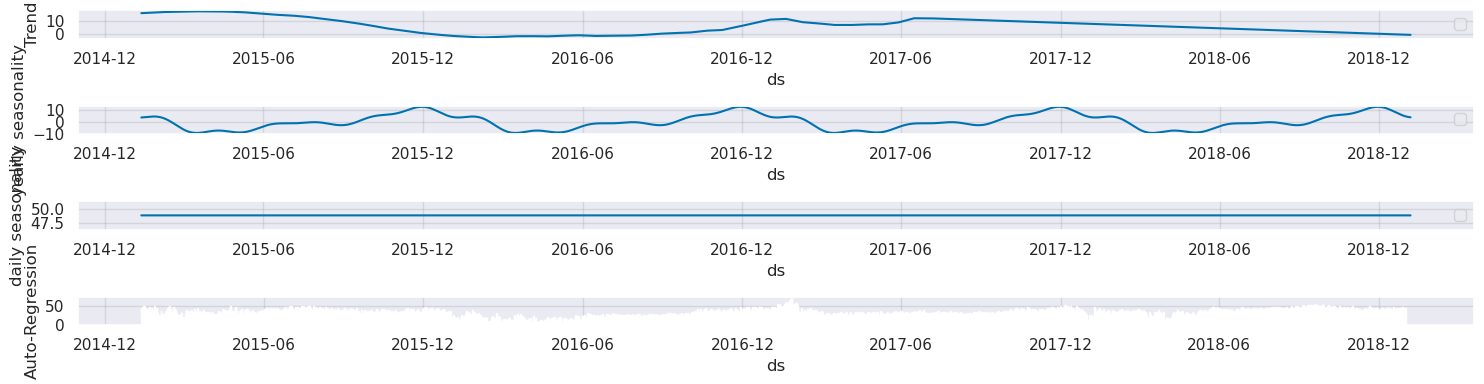

In [93]:
fig_components = m.plot_components(forecast_mbc,figsize=(15,4))

Text(0.5, 1.0, 'Model Loss (MAE)')

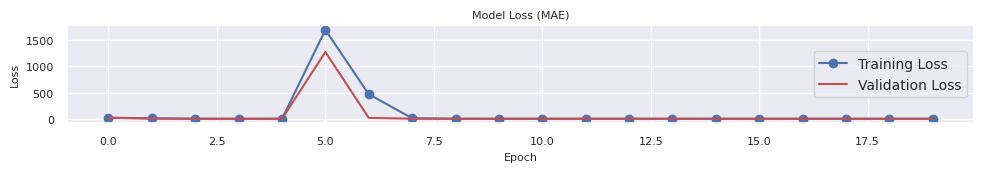

In [94]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.plot(metrics["MAE"], '-o', label="Training Loss")  
ax.plot(metrics["MAE_val"], '-r', label="Validation Loss")
ax.legend(loc='center right', fontsize=10)
ax.tick_params(axis='both', which='major', labelsize=8)
ax.set_xlabel("Epoch", fontsize=8)
ax.set_ylabel("Loss", fontsize=8)
ax.set_title("Model Loss (MAE)", fontsize=8)

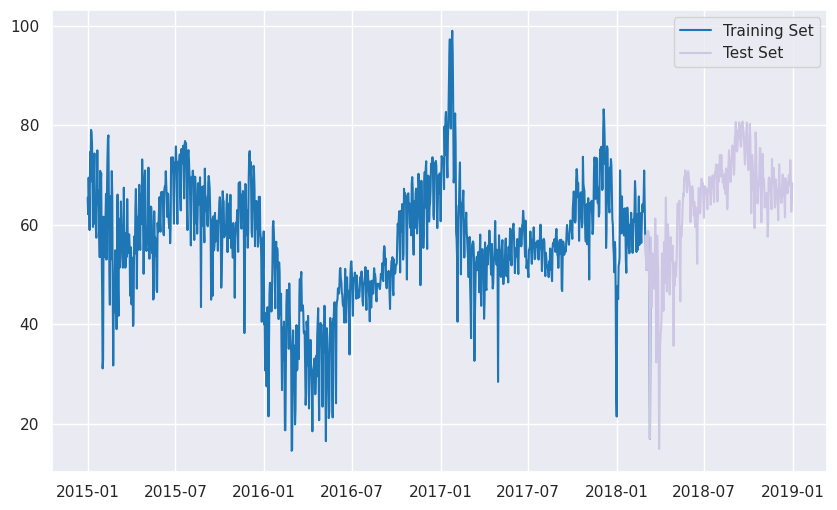

In [95]:
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)
ax.plot(df_train['ds'].dt.to_pydatetime(), df_train["y"], color='#1f76b4', label='Training Set')
#ax.plot(df_valid['ds'].dt.to_pydatetime(), df_valid["y"], color='#fc7d0b', label='Validation Set')
ax.plot(df_test['ds'].dt.to_pydatetime(), df_test["y"], color='#CDC7E5', label='Test Set')
ax.legend()
plt.show()